In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np
import scipy

In [2]:
def make_scatterplot_full(uncertainty, outcomes):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].scatter(uncertainty, outcomes.get("continuity_mean"))
    axs[0].set_title("continuity_mean")
    axs[0].set_xlabel(uncertainty.name)
    axs[0].set_ylabel('continuity_mean')
    
    axs[1].scatter(uncertainty, outcomes.get("connectivity_mean"))
    axs[1].set_title("connectivity_mean")
    axs[1].set_xlabel(uncertainty.name)
    axs[1].set_ylabel('connectivity_mean')
    
    axs[2].scatter(uncertainty, outcomes.get("node_frequency_mean"))
    axs[2].set_title("node_frequency_mean")
    axs[2].set_xlabel(uncertainty.name)
    axs[2].set_ylabel('node_frequency_mean')
    

# Read in data

In [9]:
points_together_OA_experiments, points_together_OA_outcomes = load_results('data/points_together/results_points_together_OA.gz')
points_together_RP_experiments, points_together_RP_outcomes = load_results('data/points_together/results_points_together_RP.gz')
points_together_TA_experiments, points_together_TA_outcomes = load_results('data/points_together/results_points_together_TA.gz')
points_together_HS_experiments, points_together_HS_outcomes = load_results('data/points_together/results_points_together_HS.gz')

In [10]:
points_together_OA_outcomes.keys()

dict_keys(['continuity_mean', 'continuity_var', 'connectivity_mean', 'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])

# Analysis

Correlations

In [11]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'connectivity_mean', 'node_frequency_mean'])
p_mat = pd.DataFrame()


for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["TA", value] = scipy.stats.kendalltau(points_together_TA_experiments["TA"], pd.DataFrame(points_together_TA_outcomes)[value])[0]
    p_mat.at["TA", value] = scipy.stats.kendalltau(points_together_TA_experiments["TA"], pd.DataFrame(points_together_TA_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["OA", value] = scipy.stats.kendalltau(points_together_OA_experiments["OA"], pd.DataFrame(points_together_OA_outcomes)[value])[0]
    p_mat.at["OA", value] = scipy.stats.kendalltau(points_together_OA_experiments["OA"], pd.DataFrame(points_together_OA_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["HS", value] = scipy.stats.kendalltau(points_together_HS_experiments["HS"], pd.DataFrame(points_together_HS_outcomes)[value])[0]
    p_mat.at["HS", value] = scipy.stats.kendalltau(points_together_HS_experiments["HS"], pd.DataFrame(points_together_HS_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["RP", value] = scipy.stats.kendalltau(points_together_RP_experiments["RP"], pd.DataFrame(points_together_RP_outcomes)[value])[0]
    p_mat.at["RP", value] = scipy.stats.kendalltau(points_together_RP_experiments["RP"], pd.DataFrame(points_together_RP_outcomes)[value])[1]

In [12]:
corr_mat

,continuity_mean,connectivity_mean,node_frequency_mean
TA,0.950477,-0.366109,-0.248969
OA,0.927097,0.085965,0.186939
HS,0.26075,-0.869485,0.647725
RP,-0.780691,0.585108,0.130801


In [13]:
p_mat

,continuity_mean,connectivity_mean,node_frequency_mean
TA,1.108686e-42,1.162092e-07,3.346092e-04
OA,7.123003e-40,2.187969e-01,7.703567e-03
HS,2.978112e-04,4.622296e-34,2.577215e-19
RP,7.899227e-29,3.222246e-17,6.192232e-02


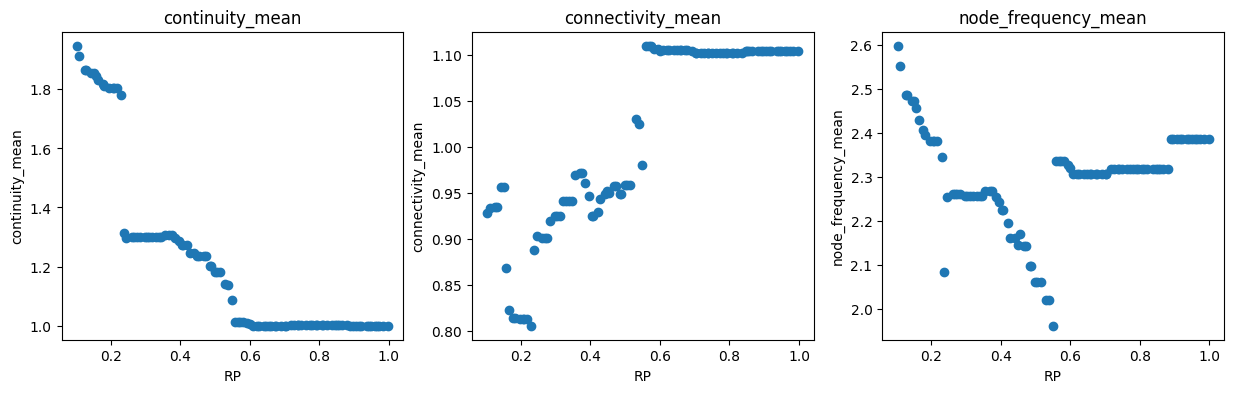

In [14]:
make_scatterplot_full(points_together_RP_experiments["RP"], points_together_RP_outcomes)

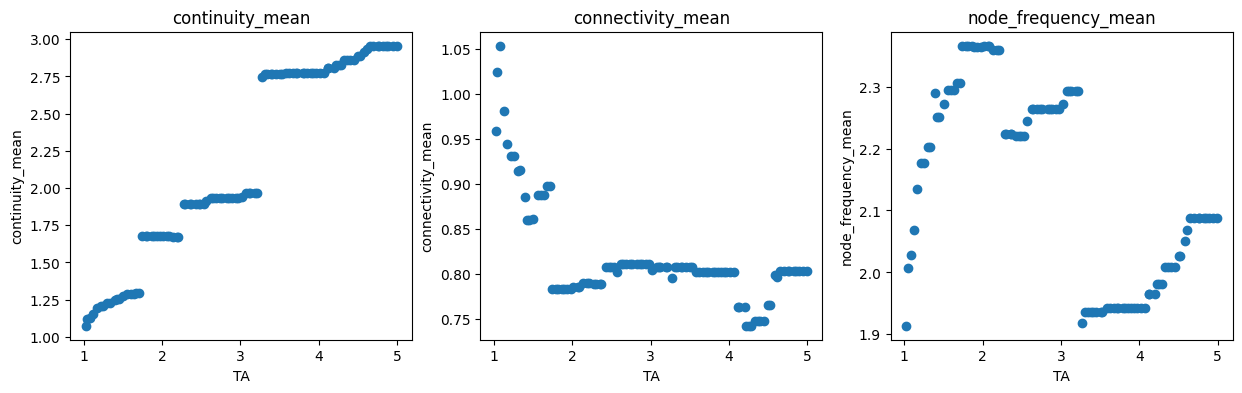

In [15]:
make_scatterplot_full(points_together_TA_experiments["TA"], points_together_TA_outcomes)

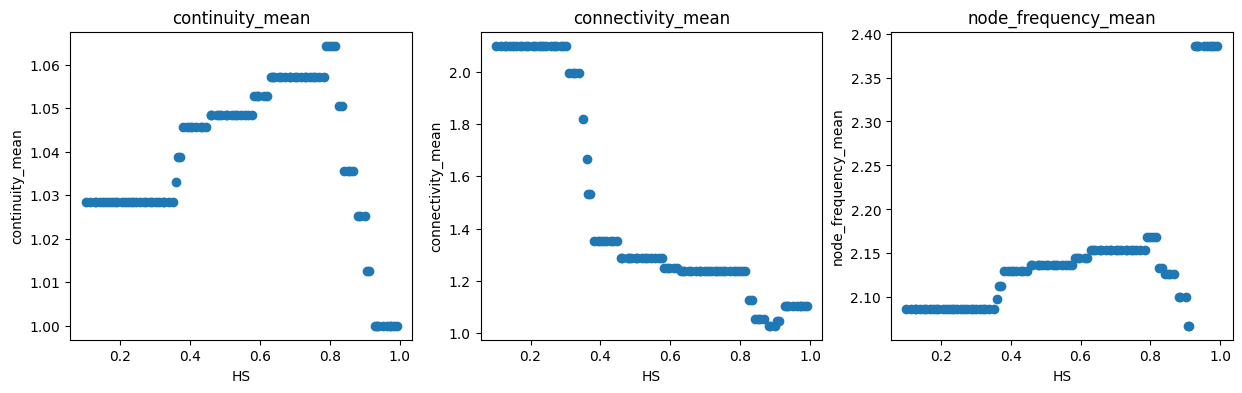

In [17]:
make_scatterplot_full(points_together_HS_experiments["HS"], points_together_HS_outcomes)

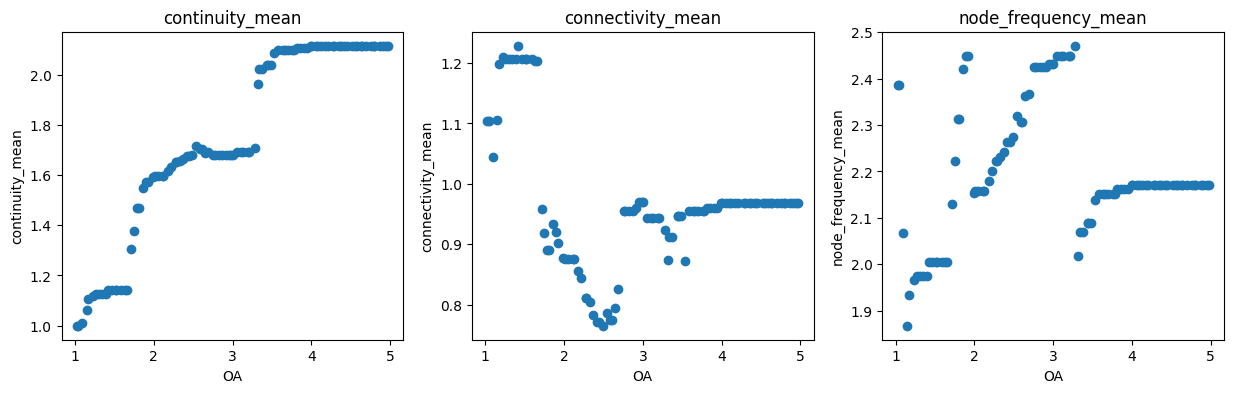

In [18]:
make_scatterplot_full(points_together_OA_experiments["OA"], points_together_OA_outcomes)